# Demonstration 1: Simple Linear Regression in Python


**1. Import Modules**  
The first step is always to import all the necessary libraries.  
We need a library for matrix computation and a library to make fancy graphs

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**2.  Define helper functions**  
As good programmers, we like modularised code!  
This means that we write little functions for each subtask of the regression problem :)

In [7]:
def generateData(thetas,x,sigma):
  # generate some data by adding gaussian noise (sigma) to a 
  # linear function of x, parametrised by theta  
  return linearFunction(x,thetas)+(sigma*np.random.randn(x.shape[0])+0)

  
def linearFunction(x,thetas):
  # defines a simple linear function - the line we're going to fit    
  return thetas[0] + thetas[1]*x
  


**3. Generate and visualise some toy data**  
Let's first generate some toy data and display it as scatter plot!

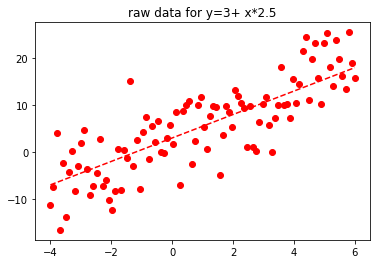

In [4]:
# define parameters
xRange   = [-4,6]
noiseVar = 5
thetas   = [3,2.5]

# generate data
x      = np.linspace(xRange[0],xRange[1],100)
y      = linearFunction(x,thetas)
yNoisy = generateData(thetas,x,noiseVar)

# display data
plt.plot(x,y,'--',color='red')
plt.plot(x,yNoisy,'o',color='red')  
plt.xlabel = 'x'
plt.ylabel = 'y'
plt.title('raw data for y=' + str(thetas[0]) +'+ x*' + str(thetas[1]))
plt.show()


**4. Compute the simple least squares solution**  
First we'll compute the ols solutions as outlined in the slides.  
Remember that we just need to compute the mean, covariance and variance

true thetas: [3, 2.5]
theta hats: [2.85037936 2.70498185]


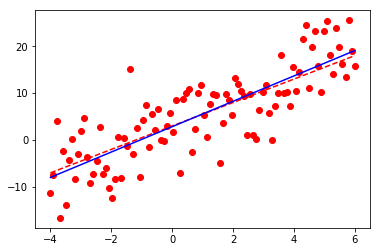

In [5]:
def computeThetaHats(x,y):
  # computes the slope and intercept based on the mean, covariance 
  # and variance terms
  thetaHat = np.empty(2)
  # 1. slope
  thetaHat[1] = np.cov(x,y)[0,1]/np.var(x)
  # 2. intercept
  thetaHat[0] = np.mean(y) - thetaHat[1]*np.mean(x)
  return thetaHat



# let's fit a line and print estimated parameters:
thetaHats = computeThetaHats(x,yNoisy)
yHat = linearFunction(x,thetaHats)

print('true thetas: ' + str(thetas))
print('theta hats: ' + str(thetaHats))

# plot the results:
plt.plot(x,y,'--',color='red')
plt.plot(x,yNoisy,'o',color='red')  
plt.plot(x,yHat,'-',color='blue')
plt.xlabel = 'x'
plt.ylabel = 'y'
plt.show()

**5. OLS solution**  
Now we generalise our solution into a matrix form that allows us to compute results for multivariable regression!  
Remember: we just need to include a constant column to move the intercept inside the formula and solve for theta using the Moore-Penrose Pseudoinverse!

true thetas: [3, 2.5]
theta hats: [2.87742917 2.67793203]


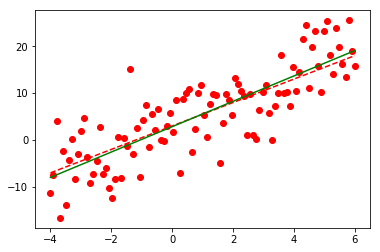

In [8]:
def computeOLSsolution(X,y):
  # computes the OLS solution for all thetas using matrix algebra
  return np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y))

# set up the design matrix (add column of ones)
intercept = np.ones((len(x),1))
X = np.concatenate((intercept,np.expand_dims(x,axis=1)),axis=1)

# obtain thetaHats:
thetaHats = computeOLSsolution(X,yNoisy)
print('true thetas: ' + str(thetas))
print('theta hats: ' + str(thetaHats))

# display results
plt.plot(x,y,'--',color='red')
plt.plot(x,yNoisy,'o',color='red')  
plt.plot(x,yHat,'-',color='green')
plt.xlabel = 'x'
plt.ylabel = 'y'
plt.show()